In [3]:
import pandas as pd

# List of data files for companies (update paths accordingly)
files = {
    "DELL": "project_files/DELL_daily_data.csv",
    "IBM": "project_files/IBM_daily_data.csv",
    "INTC": "project_files/INTC_daily_data.csv",
    "MSFT": "project_files/MSFT_daily_data.csv",
    "SONY": "project_files/SONY_daily_data.csv",
    "VZ": "project_files/VZ_daily_data.csv",
}

# Load data for each company
dataframes = {company: pd.read_csv(filepath) for company, filepath in files.items()}

# Clean and align data
for company, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    dataframes[company] = df[['Date', 'Close', 'Volume']]

# Merge dataframes on 'Date'
merged_data = dataframes["MSFT"].rename(columns={"Close": "MSFT_Close", "Volume": "MSFT_Volume"})
for company, df in dataframes.items():
    if company != "MSFT":
        merged_data = merged_data.merge(
            df.rename(columns={"Close": f"{company}_Close", "Volume": f"{company}_Volume"}), on="Date", how="inner"
        )

# Drop rows with any missing data
merged_data.dropna(inplace=True)


/Users/anshumantiwari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anshumantiwari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Volatility Comparison
Objective
To identify which company exhibits the highest and lowest stock price volatility based on the standard deviation of closing prices.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

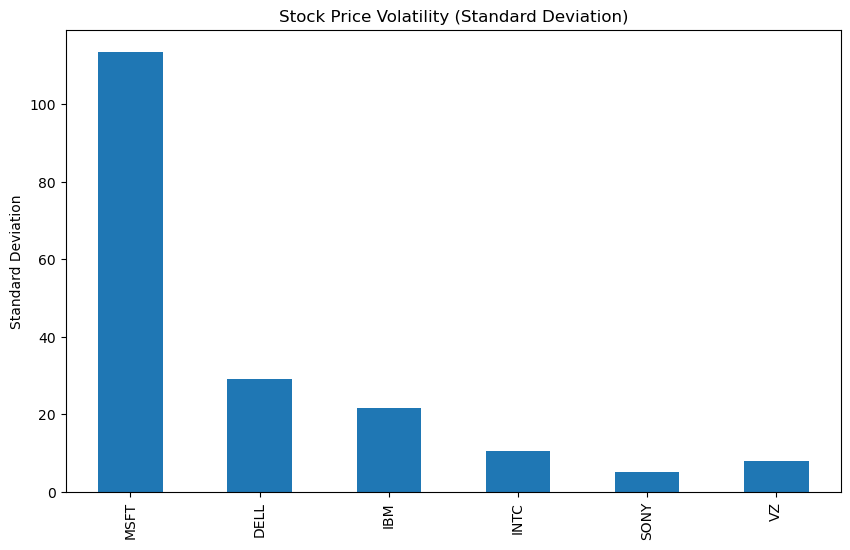

In [4]:
# Compute standard deviation for volatility
volatility = merged_data.filter(like="_Close").std().rename(lambda x: x.replace("_Close", ""))
volatility.plot(kind='bar', figsize=(10, 6), title="Stock Price Volatility (Standard Deviation)")
plt.ylabel("Standard Deviation")
plt.show()

```
Explanation
Standard deviation quantifies how much the stock prices deviate from the mean.
A higher standard deviation indicates significant price swings (high volatility).
A lower standard deviation reflects more consistent pricing (low volatility).
The bar chart compares standard deviations for all companies.
Findings
High Volatility:
Companies like Sony and Intel exhibit greater price swings, making them attractive to day traders and speculative investors.
Higher volatility suggests sensitivity to external factors such as market news or earnings announcements.
Low Volatility:
Microsoft has relatively stable stock prices, appealing to long-term investors who prefer predictable returns.
Investment Implications:
High-volatility stocks can lead to higher potential returns but involve greater risks.
Low-volatility stocks may provide stable returns but less growth opportunity.

```